In [ ]:
"""" 
Voorlopige analyse van alfa en growth rate.
Alle lijntje in de plotjes zijn nu nog van 1 simulatie. Gemiddeldes van meerdere simulaties zal beter zijn!
Maar dit geeft al wel een aardig beeld van de effecten.
"""

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [293]:
def loop_grid(matrix, mkd, a):
    
    # protential grid
    transH = np.ones((50,50))
    transI = np.ones((50,50))
    transC = np.ones((50,50))
    
    list_distances = [1, 1.4, 2, 2.2, 2.8, 3, 3.2, 3.6, 4, 4.1, 4.2, 4.5, 5, 5.1, 5.4, 5.7, 5.8, 6, 6.1, 6.3, 6.4, 6.7, 7.1, 7.2, 7.8, 8.5]
    
    #i,j current house grid
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            # k,l is neighbourhood
            for k in range(i-6, i+7):
                for l in range(j-6, j+7):
                    
                    #only if neighboorhoud exists
#                   check if the neigbours are inside grid
                    if k < 0 or k > 49 or l < 0 or l > 49:
                        continue
            
                    else:
                        '''zoek op in dict:
                        ik ben zelf Matrix[i,j]
                        ik kijk naar Matrix[k,l]
                        ik kan worden loop [H, I, C] en update probabilitygrid
                        Eet een koekje
                        '''  
                    
#                       als degene waar je naar kijkt een huis is
                        if matrix[k, l] != 0 and (k, l) != (i, j) and matrix[i, j] != 3:
        
#                           op basis van hoe ver het huis van je vandaan zit krijg je een score uit de mkd
                            # Trans House potential
    
                            distance = round(np.sqrt((abs(i - k))**2 + (abs(l - j))**2), 1)
                            index_distance = list_distances.index(distance)
    
    
                            # kans op house worden, met wat we zelf zijn (matrix[i, j]) bepaald door plek waar we kijken en distance
#                             print(mkd[int(matrix[i, j])][1][int(matrix[k, l])][distance])
                            if matrix[i, j] != 2 and matrix[i, j] != 3:
                                transH[i, j] += mkd[int(matrix[i, j])][1][int(matrix[k, l])-1][index_distance]
            
                            # Trans Industry potential
                            if matrix[i, j] != 3:
                                transI[i, j] += mkd[int(matrix[i, j])][2][int(matrix[k, l])-1][index_distance]
                    
                            # Trans Commerce potential
                            transC[i, j] += mkd[int(matrix[i, j])][3][int(matrix[k, l])-1][index_distance]
                            
    for i in range(len(transH)):
        for j in range(len(transH[0])):
            S = 1 + (-np.log(random.random()))**(a)
            transH[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transI[i, j] *= S
            S = 1 + (-np.log(random.random()))**(a)
            transC[i, j] *= S
            

    return transH, transI, transC

In [294]:
# V, H, I, C
# 0, 1, 2, 3


def urban_growth(Nh, a):
    
    width = 50
    height = 50

    city = np.zeros((width, height))

    steps = 25

    initial_commerce = [(25,25), (25,24), (26,24)]
    initial_industry = [(26,25), (26,26), (26,27), (27,23)]
    initial_houses = [(23,25), (23,26), (24,23), (24,24), (24,25), (24,26), (25,23), (25,26), (26,23), (27,24), (27,25), (27,26)]

    for com in initial_commerce:
        city[com] = 3

    for ind in initial_industry:
        city[ind] = 2

    for h in initial_houses:
        city[h] = 1

    # city[(25, 25)] = 1
    plt.matshow(city, cmap = 'Greys')
    plt.colorbar()
    plt.show()

    mkd = {0: {1: [[2,2,1.5,1.5,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0], 
                   [-10,-10,-5,-3,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [-2,-1,2,1,1,1,0.5,0.5,0.4,0.3,0.2,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0]], 
               2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [3,3,2,1,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
               3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [25,25,25,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0]]}, 
           1: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
               2: [[-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
               3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
                   [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0]]},
           2: {1: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
               2: [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], 
               3: [[4,3.5,3,2.5,2,2,2,1.5,1.5,1.5,1.5,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0], 
                   [-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                   [25,25,25,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0]]}}

    citiesovertime = []

    for step in range(steps):
        transH, transI, transC = loop_grid(city, mkd, a)

        orderedhouses = transH.flatten().argsort()[::-1]
        orderedindustry = transI.flatten().argsort()[::-1]
        orderedcommerce = transC.flatten().argsort()[::-1]

        newhouses = orderedhouses[0:round((((width*height)*Nh)/12)*7)]
        for house in range(round((((width*height)*Nh)/12)*7)):
            orderedhouses = np.delete(orderedhouses, house)

        newindustry = orderedindustry[0:round((((width*height)*Nh)/12)*4)]
        for ind in range(round((((width*height)*Nh)/12)*4)):
            orderedindustry = np.delete(orderedindustry, ind)

        newcommerce = orderedcommerce[0:round(((width*height)*Nh)/12)]
        for com in range(round(((width*height)*Nh)/12)):
            orderedcommerce = np.delete(orderedcommerce, com)

        while len(set(newcommerce) & set(newindustry)) != 0:
            for doubleindex in (set(newcommerce) & set(newindustry)):
                if transI[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                    newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                    newcommerce = np.append(newcommerce, orderedcommerce[0])
                    orderedcommerce = np.delete(orderedcommerce, 0)
                else:
                    newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                    newindustry = np.append(newindustry, orderedindustry[0])
                    orderedindustry = np.delete(orderedindustry, 0)

        while len(set(newcommerce) & set(newhouses)) != 0:
            for doubleindex in (set(newcommerce) & set(newhouses)):
                if transH[doubleindex//width, doubleindex%height] > transC[doubleindex//width, doubleindex%height]:
                    newcommerce = np.delete(newcommerce, np.where(newcommerce == doubleindex)[0])
                    newcommerce = np.append(newcommerce, orderedcommerce[0])
                    orderedcommerce = np.delete(orderedcommerce, 0)
                else:
                    newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                    newhouses = np.append(newhouses, orderedhouses[0])
                    orderedhouses = np.delete(orderedhouses, 0)

        while len(set(newhouses) & set(newindustry)) != 0:
            for doubleindex in (set(newhouses) & set(newindustry)):
                if transI[doubleindex//width, doubleindex%height] > transH[doubleindex//width, doubleindex%height]:
                    newhouses = np.delete(newhouses, np.where(newhouses == doubleindex)[0])
                    newhouses = np.append(newhouses, orderedhouses[0])
                    orderedhouses = np.delete(orderedhouses, 0)
                else:
                    newindustry = np.delete(newindustry, np.where(newindustry == doubleindex)[0])
                    newindustry = np.append(newindustry, orderedindustry[0])
                    orderedindustry = np.delete(orderedindustry, 0)


        for com in newcommerce:
            city[com//width, com%height] = 3

        for indus in newindustry:
            if city[indus//width, indus%height] != 3:
                city[indus//width, indus%height] = 2

        for house in newhouses:
            if city[house//width, house%height] != 2 and city[house//width, house%height] != 3:
                city[house//width, house%height] = 1

        citiesovertime.append(copy.deepcopy(city))

        #plt.matshow(city, vmin = 0, vmax = 3, cmap = 'Greys')
        #plt.title("Step: %i" %step)
        #plt.colorbar()
        #plt.show()
        
    return citiesovertime

In [295]:
"""
Code die de fractal dimension (of radial dimension) bepaalt van een matrix M
Verbeterpunten: 
-code bekijkt nu telkens naar vierkanten, cirkels is mis beter
-code maakt nu alleen onderscheid tussen 'vacant' en 'niet vacant', maar nog niet tussen de verschillende soorten bebouwing 
(commerce, industrie, huizen)
"""

import math


def fractal_dimension(M):

    N = len(M)

    list_radius = []
    list_number_occupied_cells = []

    # Bekijk telkens een vierkant gebied en tel het aantal bezette cellen
    # Elke tijdstap neemt de grootte van het gebied toe
    # radius is hier de halve lengte van het vierkant waar je naar kijkt
    for length in range(2, N, 2):
        radius = length/2
        left_index = math.ceil((N-length)/2)
        right_index = left_index + length - 1
        number_occupied_cells = 0
        for i in range(left_index, right_index+1):
            for j in range(left_index, right_index+1):
                if M[i, j] != 0:
                    number_occupied_cells += 1

        # Vergelijk het aantal bezette cellen van de huidige tijdstap met het aantal bezette cellen van de vorige tijdstap
        # Als ze niet gelijk zijn -> voeg waardes (radius, aantal bezette cellen) toe aan de lijsten
        if len(list_number_occupied_cells) == 0:
            list_radius.append(radius)
            list_number_occupied_cells.append(number_occupied_cells)
        else:
            if number_occupied_cells != list_number_occupied_cells[-1]:
                list_radius.append(radius)
                list_number_occupied_cells.append(number_occupied_cells)

    # Neem de log waardes van de radius en het aantal bezette cellen
    list_radius_log = [math.log10(i) for i in list_radius]
    list_number_occupied_cells_log = [math.log10(i) for i in list_number_occupied_cells]

    # Linear regression
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(list_radius_log, list_number_occupied_cells_log)
    list_fitted_data = [slope * i + intercept for i in list_radius_log]

    # Plot data
#     plt.plot(list_radius_log, list_number_occupied_cells_log, 'ko')
#     plt.plot(list_radius_log, list_fitted_data)
#     plt.xlabel("log(r)")
#     plt.ylabel("log(Bt)")
#     plt.show()

    # Fractal dimension (of radial dimension) is gelijk aan de helling van de gefitte curve
    fractal_dimension = slope
    
    return fractal_dimension




# Varieer a

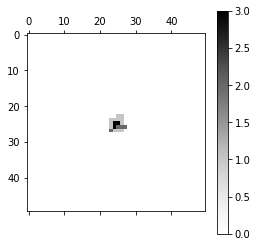

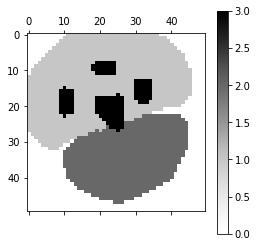

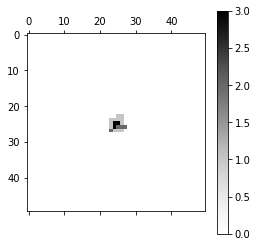

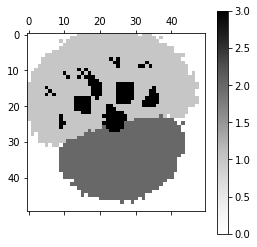

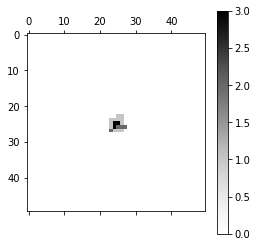

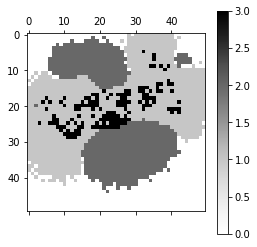

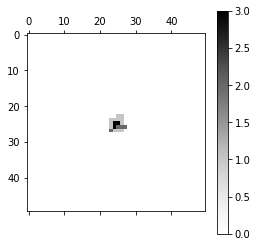

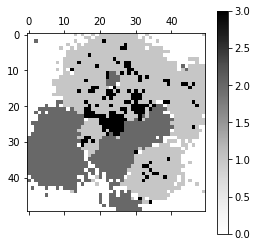

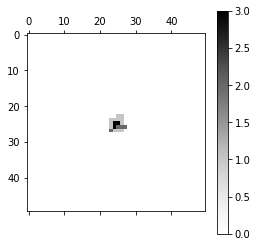

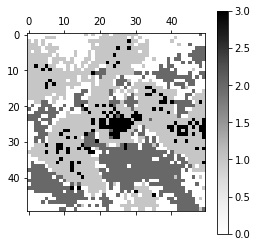

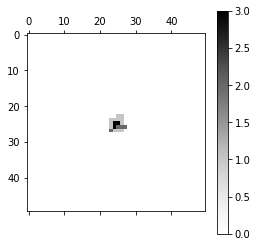

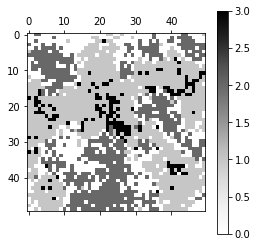

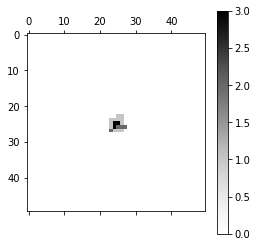

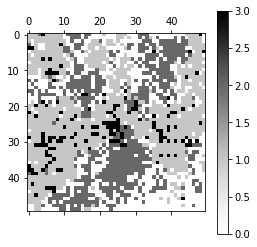

In [296]:
Nh = 0.03
range_a = np.arange(0.0, 3.5, 0.5)

#citiesovertime = urban_growth(Nh, a) 

citiesovertime_different_a = []
for a in range_a:
    citiesovertime = urban_growth(Nh, a)  
    citiesovertime_different_a.append(citiesovertime)

    plt.matshow(citiesovertime[-1], vmin = 0, vmax = 3, cmap = 'Greys')
    #plt.title("Step: %i" %step)
    plt.colorbar()
    plt.show()


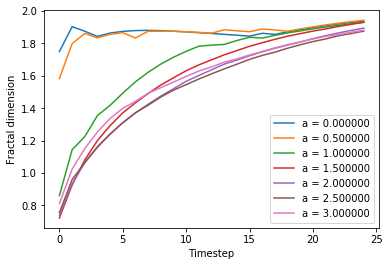

In [297]:
fds_different_a = []
for citiesovertime in citiesovertime_different_a:
    fds = []
    for city in citiesovertime:
        fds.append(fractal_dimension(city))
    fds_different_a.append(fds)

for i in range(len(range_a)):
    a = round(range_a[i], 1)
    plt.plot(range(len(citiesovertime)), fds_different_a[i], label = "a = %f" %a)
plt.xlabel("Timestep")
plt.ylabel("Fractal dimension")
plt.legend(fontsize="medium")
plt.show()

# Varieer growth rate

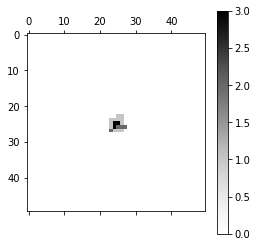

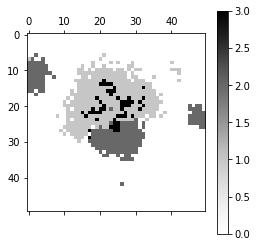

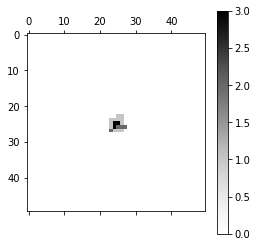

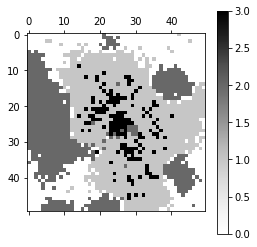

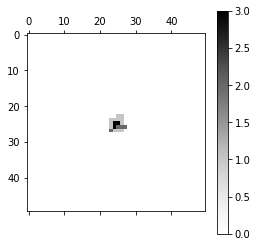

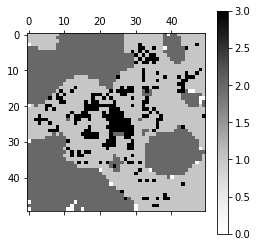

In [298]:
a = 1.5
#range_Nh = np.arange(0.01, 0.06, 0.01)
range_Nh = [0.01, 0.03, 0.05]

#citiesovertime = urban_growth(Nh, a) 

citiesovertime_different_Nh = []
for Nh in range_Nh:
    citiesovertime = urban_growth(Nh, a)  
    citiesovertime_different_Nh.append(citiesovertime)

    plt.matshow(citiesovertime[-1], vmin = 0, vmax = 3, cmap = 'Greys')
    plt.colorbar()
    plt.show()


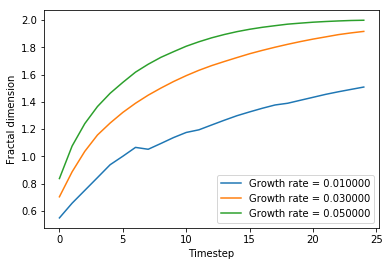

In [299]:
fds_different_Nh = []
for citiesovertime in citiesovertime_different_Nh:
    fds = []
    for city in citiesovertime:
        fds.append(fractal_dimension(city))
    fds_different_Nh.append(fds)

for i in range(len(range_Nh)):
    Nh = range_Nh[i]
    plt.plot(range(len(citiesovertime)), fds_different_Nh[i], label = "Growth rate = %f" %Nh)
plt.xlabel("Timestep")
plt.ylabel("Fractal dimension")
plt.legend(fontsize="medium")
plt.show()